# P1 Multilayer Perceptrons (Section 5.2)
1. Change the number of hidden units num hiddens and plot how its number affects the
accuracy of the model. What is the best value of this hyperparameter?
2. Try adding a hidden layer to see how it affects the results.
3. How does changing the learning rate alter your results? With all other parameters
fixed, which learning rate gives you the best results? How does this relate to the
number of epochs?

In [1]:
#!pip install d2l==1.0.3

# d2l importing
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

# libraries needed
import torch
from torch import nn
import d2l
from d2l import torch as d2l
import matplotlib.pyplot as plt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 1. Change the number of hidden units num hiddens and plot how its number affects the accuracy of the model. What is the best value of this hyperparameter?

KeyboardInterrupt: 

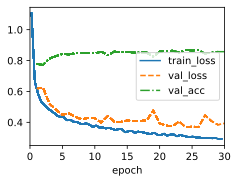

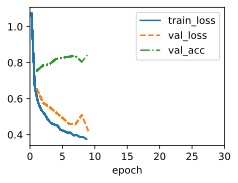

In [2]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

losses = []
num_hiddens = [64, 128, 256, 512, 1024, 2048]

data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=30)

for numHid in num_hiddens:
  model = MLP(num_outputs=10, num_hiddens=numHid, lr=0.1)
  trainer.fit(model, data)

  # Calculate validation loss
  val_acc = model.board.data['val_acc']
  losses.append(val_acc)


plt.figure()

for numHid, sublist in zip(num_hiddens, losses):
    x_values = [point.x for point in sublist]
    y_values = [point.y for point in sublist]

    plt.plot(x_values, y_values, label=f'Hidden Units: {numHid}')

plt.xlabel('Epoch')
plt.ylabel('')
plt.legend()  # Automatically creates legend from the labels specified during plotting
plt.title('Validation Acc vs Learning Rate')
plt.show()

100%|██████████| 7/7 [28:40<00:00, 245.83s/it]


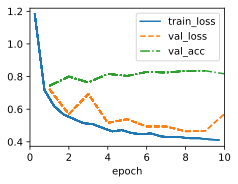

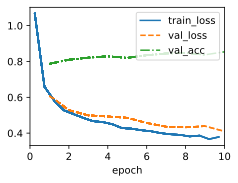

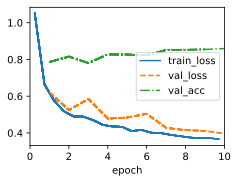

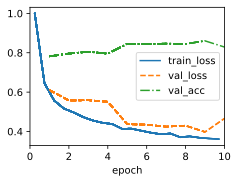

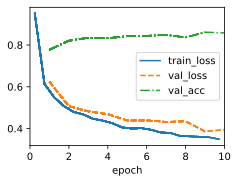

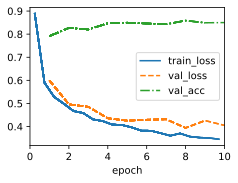

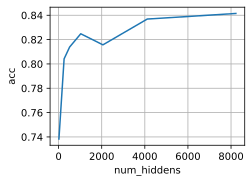

In [9]:
from tqdm import tqdm

def stat_acc(num_hiddens):
    model = MLP(num_outputs=10, num_hiddens=num_hiddens, lr=0.1)
    trainer = d2l.Trainer(max_epochs=10)#, plot_flag=False)
    trainer.fit(model, data)
    y_hat = model(data.val.data.type(torch.float32))
    return model.accuracy(y_hat,data.val.targets).item()

hiddens = [16, 256, 512, 1028, 2056, 4112, 8224]#d2l.gen_logrithm_nums(initial_value = 64, growth_factor = 2, num_elements = 8)
accs = []
for num_hiddens in tqdm(hiddens):
    accs.append(stat_acc(num_hiddens))

d2l.plot(hiddens,accs,'num_hiddens','acc')

General higher values of hidden layers seem to improve the validation accuracy with 2048 being the top accuracy in both 10 and 30 epochs. 1024 will be utilized as it is closer then the original 256 and seems to have more stability in the training_loss validation loss and validation accuracy.

Model Capacity: The number of hidden units directly affects the model's capacity to learn complex patterns in the data. Increasing the number of hidden units allows the model to capture more intricate relationships between the input features and the target labels.

Representational Power: With more hidden units, the model can represent a broader range of functions, potentially leading to better generalization and improved accuracy, especially for complex datasets.

Overfitting and Underfitting: The number of hidden units is closely related to the model's tendency to overfit or underfit the data.

Underfitting: Too few hidden units may result in underfitting, where the model fails to capture the underlying patterns in the data, leading to poor performance on both the training and validation sets.
Overfitting: Conversely, too many hidden units may lead to overfitting, where the model learns to memorize the training data, resulting in high training accuracy but poor generalization to unseen data.
Computational Complexity: Increasing the number of hidden units also increases the computational complexity of the model, as more parameters need to be trained and updated during the optimization process.

Hyperparameter Tuning: Determining the optimal number of hidden units often involves hyperparameter tuning, where different configurations are evaluated based on their performance on a validation set. The choice of the number of hidden units may depend on factors such as the complexity of the dataset, the availability of computational resources, and the desired trade-off between accuracy and computational efficiency.

# 2. Try adding a hidden layer to see how it affects the results.

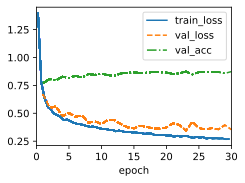

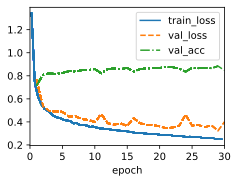

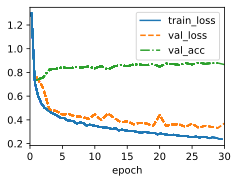

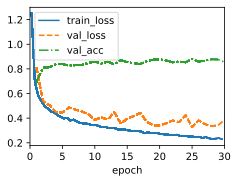

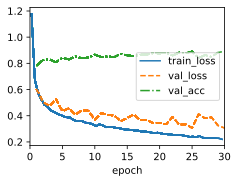

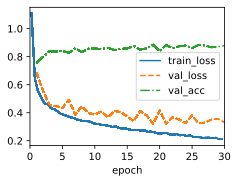

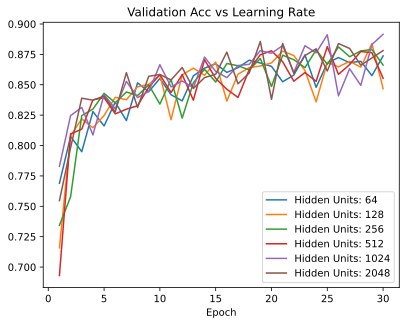

In [ ]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

losses1 = []
losses2 = []
num_hiddens = [256, 512, 1024, 2048]

data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=30)

for numHid in num_hiddens:
  model1 = MLP(num_outputs=10, num_hiddens=numHid, lr=0.1)
  model2 = MLP(num_outputs=10, num_hiddens=numHid, lr=0.1)
  trainer.fit(model1, data)
  trainer.fit(model2, data)

  # Calculate validation loss
  val_acc1 = model1.board.data['val_acc']
  val_acc2 = model2.board.data['val_acc']
  losses1.append(val_acc)
  losses2.append(val_acc)


plt.figure()

for numHid, sublist in zip(num_hiddens, losses1):
    x_values = [point.x for point in sublist]
    y_values = [point.y for point in sublist]

    plt.plot(x_values, y_values, label=f'Hidden Units: {numHid}')

plt.xlabel('Epoch')
plt.ylabel('')
plt.legend()  # Automatically creates legend from the labels specified during plotting
plt.title('Validation Acc vs Learning Rate')
plt.show()


Adding a hidden layer ____

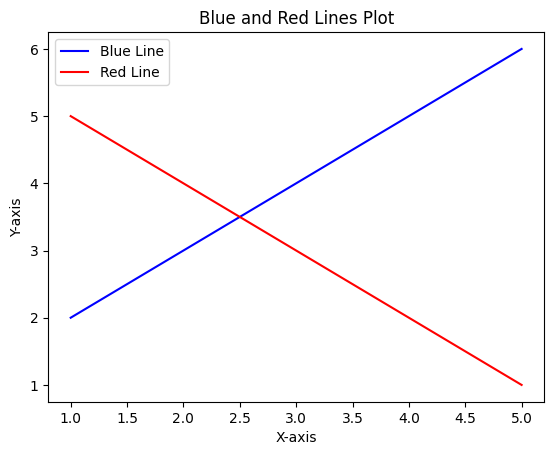

In [ ]:
import matplotlib.pyplot as plt

# Data for the blue line
x_values_blue = [1, 2, 3, 4, 5]
y_values_blue = [2, 3, 4, 5, 6]

# Data for the red line
x_values_red = [1, 2, 3, 4, 5]
y_values_red = [5, 4, 3, 2, 1]

# Plotting the blue line
plt.plot(x_values_blue, y_values_blue, color='blue', label='Blue Line')

# Plotting the red line
plt.plot(x_values_red, y_values_red, color='red', label='Red Line')

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Blue and Red Lines Plot')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


NameError: name 'val_acc' is not defined

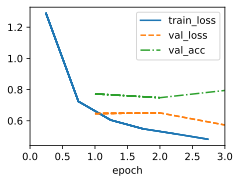

In [ ]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

losses1 = []
num_hiddens = [256]

data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=3)

for numHid in num_hiddens:
  model1 = MLP(num_outputs=10, num_hiddens=numHid, lr=0.1)
  trainer.fit(model1, data)

  # Calculate validation loss
  val_acc1 = model1.board.data['val_acc']
  losses1.append(val_acc)


plt.figure()

for numHid, sublist in zip(num_hiddens, losses1):
    x_values = [point.x for point in sublist]
    y_values = [point.y for point in sublist]

    plt.plot(x_values, y_values, label=f'Hidden Units: {numHid}')

plt.xlabel('Epoch')
plt.ylabel('')
plt.legend()  # Automatically creates legend from the labels specified during plotting
plt.title('Validation Acc vs Learning Rate')
plt.show()


ValueError: ':.' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

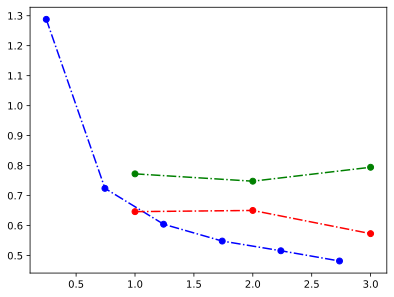

In [ ]:
import matplotlib.pyplot as plt



def plot_metrics(ordered_dict, label, linestyle='-'):
    train_loss_points = ordered_dict['train_loss']
    val_loss_points = ordered_dict['val_loss']
    val_acc_points = ordered_dict['val_acc']

    # Assuming all points have the same length
    train_loss_x = [point.x for point in train_loss_points]
    val_loss_x = [point.x for point in val_loss_points]
    val_acc_x = [point.x for point in val_acc_points]

    train_loss_values = [point.y for point in train_loss_points]
    val_loss_values = [point.y for point in val_loss_points]
    val_acc_values = [point.y for point in val_acc_points]

    plt.plot(train_loss_x, train_loss_values, marker='o', linestyle=linestyle, color='b', label=f'Train Loss - {label}')
    plt.plot(val_loss_x, val_loss_values, marker='o', linestyle=linestyle, color='r', label=f'Validation Loss - {label}')
    plt.plot(val_acc_x, val_acc_values, marker='o', linestyle=linestyle, color='g', label=f'Validation Accuracy - {label}')

# Assuming model1.board.data and model2.board.data are your datasets
plot_metrics(model1.board.data, 'Dataset 1', linestyle='-.')
plot_metrics(model1.board.data, 'Dataset 2', linestyle=':.')

plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.title('Training and Validation Metrics Comparison')
plt.legend()
plt.show()




# 3. How does changing the learning rate alter your results? With all other parameters fixed, which learning rate gives you the best results? How does this relate to the number of epochs?

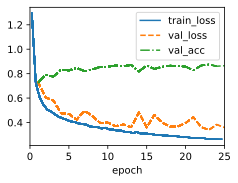

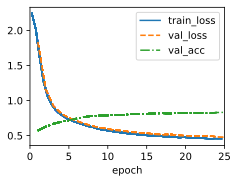

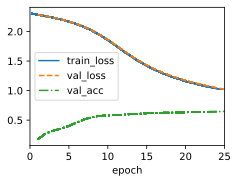

In [ ]:
# Use best parameters found earlier
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))


learning_rates = [0.1, 0.05, 0.01, 0.05]

data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=50)


for lr in learning_rates:
  model = MLP(num_outputs=10, num_hiddens=1024, lr=lr)
  trainer.fit(model, data)